In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint 

# Some motivations behind the Bazin's function

## Sigmoid introduction

Remember the sigmoid function that's widely used in a ML applications

$$f(t) = \cfrac{1}{1 + e^{-\alpha t}}$$

It may be seen as a some kind of transformation of matter (mass, density etc)
from on state to another as it gradually increases from 0 to 1. It may be
seen as the solution to the following ODE

$$\dot f = \alpha \cdot f \cdot (1 - f)$$

Let's call it 'sigmoid-generating equation'. So the rate of $f$, namely $\dot f$
corresponds to the radiation during the process of transformation.

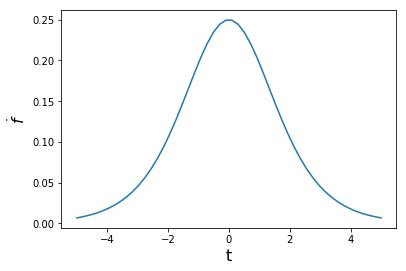

In [12]:
t = np.linspace(-5, 5)
plt.plot(t, np.exp(-t) / (1 + np.exp(-t))**2)
plt.xlabel('t', size=16)
plt.ylabel('$\\dot f$', size=16)
plt.show()

The main problem with the rate of sigmoid function in its use for approximation of light curves is its symmetric behavior. But light curves are not symmetric, they have steep rise and graduate fall. There are lots of approaches to archive that kind of behavior. The following topics state some of them.

## Generalized sigmoid

Bla-bla-bla, difeq of $\dot f = \alpha \cdot f \cdot (1 - f^\nu)$

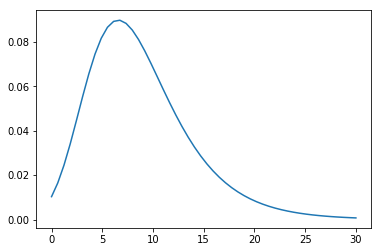

In [13]:
t = np.linspace(0, 30)
eq = lambda tau, _: 5 * tau * (1 - tau ** 0.05)
x = odeint(eq, 0.01, t)
plt.plot(t, eq(x, None))
plt.show()

## Quadratic differential equations

Another generalization may be archived by looking at more dimensions instead of adding powers. More precisely:

$$
\frac{dx}{dt} = C \cdot vec(x x^T) + A x + B
$$

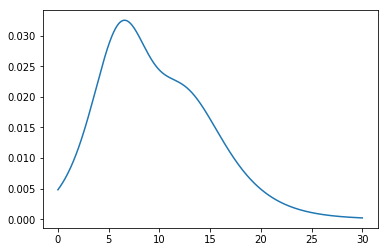

In [14]:
c = np.array([[-0.7, 1.0],
              [0.3, -2]])
b = np.array([0.2, 0.5])
eq = lambda x, _: b * x + np.sum(x * c * x.T, axis = 1)

x0 = np.array([0.01, 0.01])
t = np.linspace(0, 30, 1000)
x = odeint(eq, x0, t)

dotx = np.empty(x.shape)
for i in np.arange(len(x)):
    dotx[i, :] = eq(x[i, :], None)

plt.plot(t, dotx[:, 1])
plt.show()

The dynamics of a such non-linear object is quite rich, and so it's hard to coomprehend and deal with. For example, [Lorenz attactor](somewiklink)
is an example of dynamic systems of this type.

## Bazin's formula

The simplest generalization of sigmoid to non-symmetric case is Bazin's formula:
$$
x(t) = \frac{c}{e^{-r t} + e^{f t}}
$$
Where $r > 0$, $f > 0$ are the "rise" and "fall" exponents, and $c$ is some scale factor. The limits are:
$$
\begin{array}{rcl}
\lim\limits_{t \to -\infty} x(t) & = & c e^{r t} \\
x(0) & = & \frac 1 2 c \\
\lim\limits_{t \to +\infty} x(t) & = & c e^{-f t}
\end{array}
$$
The maximum is located at the point $t_{max} = \frac 1 {r + f} \ln\frac r f$. This fact is helpful for estimation of initial values for curve fitting.


In [ ]:

t = np.linspace(-10, 30)
x = 1 / (np.exp(-0.5 * t) + np.exp(0.1 * t))
plt.plot(t, x)
plt.show()
